In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib as mpl 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-whitegrid")
import scipy.stats as stats

In [3]:
def re_index(df, ref_ind):
    re_ind = pd.DataFrame()
    for col in df.columns:
        re_ind[str(ref_ind[int(col)-1])] = df[col]

    re_ind2 =  re_ind.set_index(ref_ind[:-1])   
    
    return re_ind2

In [4]:
def clean(df):
    residues = []
    for col in df.columns:
        try:
            int(col)
            residues.append(col)    
        except ValueError:
            continue
        
    
    df = df[residues]

    return df

In [5]:
def add_missing_data(df, ind, axis, length):
    if axis == 'column':
        cols = []
        new_nums = []
        for i in df.columns:
            cols.append(int(i))

        for i in range(2,len(ind)+1):
            if i not in cols:
                new_nums.append(str(i))
                
    if axis == 'row':    
        ind =[]
        new_nums = []
        for i in df.index:
            ind.append(i)
        for i in range(1,length):
            if i not in ind:
                new_nums.append(i)
            
            
    return new_nums

## import raw and wrangle data

In [38]:
path = '../CM_VX809_R1070W_F508del/closed_templates_only/clean_energy_breakdown/'
file_list = os.listdir(path)
print (len(file_list))
del [file_list[0]]
file_list2 = [path + i for i in file_list]

100


In [39]:
#for standard residue energy breakdown....
dataframes=[]

for f in file_list2:
    dataframes.append(pd.read_table(f, delim_whitespace=True, names=['SCORE','pose_id','resi1','pdbid1','restype1','resi2','pdbid2','restype2','fa_atr','fa_rep','fa_sol','fa_intra_rep','fa_intra_sol_xover4','lk_ball_wtd','fa_elec','pro_close','hbond_sr_bb','hbond_lr_bb','hbond_bb_sc','hbond_sc','dslf_fa13','omega','fa_dun','p_aa_pp','yhh_planarity','ref','rama_prepro','total','description']))

len(dataframes)

99

In [40]:
grouped_dfs =[]
for i in dataframes:
    grouped_col = i.groupby(['resi1', 'resi2']).mean()
    grouped_col.reset_index(inplace=True)
    grouped_dfs.append(grouped_col)

In [41]:
R1070W_VX809_cl_results = [] 
for i in grouped_dfs:
    for_heatmap = i[['resi1', 'resi2', 'total']]
    result = for_heatmap.pivot(index='resi1', columns='resi2', values='total')
    result.fillna(0, inplace=True)
    R1070W_VX809_cl_results.append(result)

## reindex data frames to CFTR sequence

In [42]:
ind_WT_cl = np.concatenate([range(5,403), range(439,646), range(844,884), range(909,1173), range(1207,1437)])
ind_F508del_cl = np.concatenate([range(5,403), range(439,508), range(509,646), range(844,884), range(909,1173), range(1207,1437)])


ind_WT_op = np.concatenate([range(1,410), range(435,638), range(845,890), range(900,1174), range(1202,1452)])
ind_F508del_op =  np.concatenate([range(1,410), range(435,508),  range(509,638), range(845,890), range(900,1174), range(1202,1452)])

In [47]:
ind_F508del_cl

array([   5,    6,    7, ..., 1434, 1435, 1436])

In [43]:
WT_cl_reindexed_results = []
for k,val in enumerate(WT_cl_results):
    j = val
    print(k)
    # reset index to residue number
    j.to_csv('temp.csv')
    WT_cl = pd.read_csv('temp.csv')
    WT_cl= WT_cl.set_index('resi1')

    # look for any missing rows
    add_row = add_missing_data(WT_cl, ind_WT_cl, 'row', 1140)
    # add missing rows
    for i in add_row:
        WT_cl.loc[i] = 0
        print('adding row ' + str(i))
    
    #reindex to place new row into proper location
    WT_cl = WT_cl.reindex([x for x in range(1,len(WT_cl.index)+1)])

    # reset index to the proper resiude number
    WT_cl = WT_cl.set_index(ind_WT_cl)

    # add any missing columns by searching for them against the known index in the given dataframe
    add_col = add_missing_data(WT_cl, ind_WT_cl, 'column', 1140)
    
    # insert the new columns in the correct place 
    for i in add_col:
        #print('adding columns ' + i)
        WT_cl.insert(int(i)-2, i, 0)
    
    try:
        WT_cl = WT_cl.drop(columns = ['1140', '1141'])
    except KeyError:
        continue
    
    # reset column names to the proper residue name 
    WT_cl.columns = [str(x) for x in ind_WT_cl][1:]
    
    WT_cl_reindexed_results.append(WT_cl)

0
adding row 605
adding row 1139
1
adding row 605
adding row 1139
2
adding row 605
adding row 1139
3
adding row 605
adding row 1139
4
adding row 605
adding row 1139
5
adding row 605
adding row 1139
6
adding row 605
adding row 1139
7
adding row 605
adding row 1139
8
adding row 605
adding row 1139
9
adding row 605
adding row 1139
10
adding row 605
adding row 1139
11
adding row 605
adding row 1139
12
adding row 605
adding row 1139
13
adding row 605
adding row 1139
14
adding row 605
adding row 1139
15
adding row 605
adding row 1139
16
adding row 605
adding row 1139
17
adding row 605
adding row 1139
18
adding row 605
adding row 1139
19
adding row 605
adding row 1139
20
adding row 605
adding row 1139
21
adding row 605
adding row 645
adding row 1139
22
adding row 605
adding row 1139
23
adding row 605
adding row 1139
24
adding row 605
adding row 1139
25
adding row 605
adding row 1139
26
adding row 605
adding row 1139
27
adding row 605
adding row 1139
28
adding row 605
adding row 1139
29
adding

In [44]:
F508del_cl_reindexed_results = []
for k, val in enumerate(F508del_cl_results):
    j = val
    print(k)
    # reset index to residue number
    j.to_csv('temp.csv')
    F508del_cl = pd.read_csv('temp.csv')
    # reset index to residue number
    F508del_cl= F508del_cl.set_index('resi1')

    # look for any missing rows
    add_row = add_missing_data(F508del_cl, ind_F508del_cl, 'row', 1139)
    # add missing rows
    for i in add_row:
        F508del_cl.loc[i] = 0
        print('adding row ' + str(i))
    
    #reindex to place new row into proper location
    F508del_cl = F508del_cl.reindex([x for x in range(1,len(F508del_cl.index)+1)])

    # reset index to the proper resiude number
    F508del_cl = F508del_cl.set_index(ind_F508del_cl)

    # add any missing columns by searching for them against the known index in the given dataframe
    add_col = add_missing_data(F508del_cl, ind_F508del_cl, 'column', 1139)
    # insert the new columns in the correct place 
    for i in add_col:
        print('adding columns ' + i)
        F508del_cl.insert(int(i)-2, i, 0)
        
    try:
        F508del_cl = F508del_cl.drop(columns = ['1139', '1140'])
    except KeyError:
        continue


    # reset column names to the proper residue name 
    F508del_cl.columns = [str(x) for x in ind_F508del_cl][1:]
    
    #add in nans for 508 indices and columns
    F508del_cl.loc[508] = np.nan
    F508del_cl = F508del_cl.sort_index()
    F508del_cl.insert(466, '508', np.nan)
    
    
    
    F508del_cl_reindexed_results.append(F508del_cl)

0
adding row 604
adding row 1138
adding columns 605
adding columns 909
1
adding row 604
adding row 1138
adding columns 605
adding columns 645
adding columns 909
2
adding row 604
adding row 1138
adding columns 605
adding columns 645
adding columns 909
3
adding row 604
adding row 1138
adding columns 605
adding columns 645
adding columns 909
4
adding row 604
adding row 1138
adding columns 605
adding columns 645
adding columns 909
5
adding row 604
adding row 1138
adding columns 605
adding columns 645
adding columns 909
6
adding row 604
adding row 1138
adding columns 605
adding columns 645
adding columns 909
7
adding row 604
adding row 1138
adding columns 605
adding columns 645
adding columns 909
8
adding row 604
adding row 1138
adding columns 605
adding columns 645
adding columns 909
9
adding row 604
adding row 1138
adding columns 605
adding columns 645
adding columns 909
10
adding row 604
adding row 1138
adding columns 605
adding columns 645
adding columns 909
11
adding row 604
adding row

adding row 604
adding row 1138
adding columns 605
adding columns 645
adding columns 909
93
adding row 604
adding row 1138
adding columns 605
adding columns 909
94
adding row 604
adding row 1138
adding columns 605
adding columns 645
adding columns 909
95
adding row 604
adding row 1138
adding columns 605
adding columns 645
adding columns 909
96
adding row 604
adding row 1138
adding columns 605
adding columns 645
adding columns 909
97
adding row 604
adding row 1138
adding columns 605
adding columns 645
adding columns 909
98
adding row 604
adding row 1138
adding columns 605
adding columns 645
adding columns 909


In [43]:
F508del_VX8_cl_reindexed_results = []
for k, val in enumerate(F508del_VX8_cl_results):
    j = val
    print(k)
    # reset index to residue number
    j.to_csv('temp.csv')
    F508del_cl = pd.read_csv('temp.csv')
    # reset index to residue number
    F508del_cl= F508del_cl.set_index('resi1')

    # look for any missing rows
    add_row = add_missing_data(F508del_cl, ind_F508del_cl, 'row', 1139)
    # add missing rows
    for i in add_row:
        F508del_cl.loc[i] = 0
        print('adding row ' + str(i))
    
    #reindex to place new row into proper location
    F508del_cl = F508del_cl.reindex([x for x in range(1,len(F508del_cl.index)+1)])

    # reset index to the proper resiude number
    F508del_cl = F508del_cl.set_index(ind_F508del_cl)

    # add any missing columns by searching for them against the known index in the given dataframe
    add_col = add_missing_data(F508del_cl, ind_F508del_cl, 'column', 1139)
    # insert the new columns in the correct place 
    for i in add_col:
        print('adding columns ' + i)
        F508del_cl.insert(int(i)-2, i, 0)
        
    try:
        F508del_cl = F508del_cl.drop(columns = ['1139', '1140'])
    except KeyError:
        continue


    # reset column names to the proper residue name 
    F508del_cl.columns = [str(x) for x in ind_F508del_cl][1:]
    
    #add in nans for 508 indices and columns
    F508del_cl.loc[508] = np.nan
    F508del_cl = F508del_cl.sort_index()
    F508del_cl.insert(466, '508', np.nan)
    
    
    
    F508del_VX8_cl_reindexed_results.append(F508del_cl)

0
adding row 604
adding row 1138
adding columns 605
adding columns 645
adding columns 909
1
adding row 604
adding row 1138
adding columns 605
adding columns 645
adding columns 909
2
adding row 604
adding row 1138
adding columns 605
adding columns 645
adding columns 909
3
adding row 604
adding row 1138
adding columns 605
adding columns 645
adding columns 909
4
adding row 604
adding row 1138
adding columns 605
adding columns 645
adding columns 909
5
adding row 604
adding row 1138
adding columns 605
adding columns 645
adding columns 909
6
adding row 604
adding row 1138
adding columns 605
adding columns 645
adding columns 909
7
adding row 604
adding row 1138
adding columns 605
adding columns 645
adding columns 909
8
adding row 604
adding row 1138
adding columns 605
adding columns 645
adding columns 909
9
adding row 604
adding row 1138
adding columns 605
adding columns 645
adding columns 909
10
adding row 604
adding row 1138
adding columns 605
adding columns 909
11
adding row 604
adding row

ValueError: Length mismatch: Expected 1139 rows, received array of length 1138

In [45]:
R1070W_cl_reindexed_results = []

for k,val in enumerate(R1070W_cl_results):
    
    j = val
    print(k)
    # reset index to residue number
    j.to_csv('temp.csv')
    R1070W_cl = pd.read_csv('temp.csv')
    # reset index to residue number
    R1070W_cl = R1070W_cl.set_index('resi1')

    # look for any missing rows
    add_row = add_missing_data(R1070W_cl, ind_F508del_cl, 'row', 1139)
    #add_row=[1137, 1138]
    # add missing rows
    for i in add_row:
        R1070W_cl.loc[i] = 0
        print('adding row ' + str(i))

    #reindex to place new row into proper location
    R1070W_cl = R1070W_cl.reindex([x for x in range(1,len(R1070W_cl.index)+1)])

    # reset index to the proper resiude number
    R1070W_cl = R1070W_cl.set_index(ind_F508del_cl)

    # add any missing columns by searching for them against the known index in the given dataframe
    add_col = add_missing_data(R1070W_cl, ind_F508del_cl, 'column', 1139)
    # insert the new columns in the correct place 
    for i in add_col:
        print('adding columns ' + i)
        R1070W_cl.insert(int(i)-2, i, 0)

    
    
    try:
        R1070W_cl = R1070W_cl.drop(columns = ['1139', '1140'])
    except KeyError:
        continue

    # reset column names to the proper residue name 
    R1070W_cl.columns = [str(x) for x in ind_F508del_cl][1:]
    
    #add in nans for 508 indices and columns
    R1070W_cl.loc[508] = np.nan
    R1070W_cl = R1070W_cl.sort_index()
    R1070W_cl.insert(466, '508', np.nan)
    
    
    R1070W_cl_reindexed_results.append(R1070W_cl)

0
adding row 604
adding row 1138
adding columns 605
adding columns 645
adding columns 909
1
adding row 604
adding row 1138
adding columns 605
adding columns 645
adding columns 909
2
adding row 604
adding row 1138
adding columns 605
adding columns 909
3
adding row 604
adding row 1138
adding columns 605
adding columns 645
adding columns 909
4
adding row 604
adding row 1138
adding columns 605
adding columns 645
adding columns 909
5
adding row 604
adding row 1138
adding columns 605
adding columns 645
adding columns 909
6
adding row 604
adding row 1138
adding columns 605
adding columns 645
adding columns 909
7
adding row 604
adding row 1138
adding columns 605
adding columns 645
adding columns 909
8
adding row 604
adding row 1138
adding columns 605
adding columns 909
9
adding row 604
adding row 1138
adding columns 605
adding columns 645
adding columns 909
10
adding row 604
adding row 1138
adding columns 605
adding columns 645
adding columns 909
11
adding row 604
adding row 1138
adding column

adding row 604
adding row 1138
adding columns 605
adding columns 645
adding columns 909
94
adding row 604
adding row 1138
adding columns 605
adding columns 645
adding columns 909
95
adding row 604
adding row 1138
adding columns 605
adding columns 645
adding columns 909
96
adding row 604
adding row 1138
adding columns 605
adding columns 645
adding columns 909
97
adding row 604
adding row 1138
adding columns 605
adding columns 909
98
adding row 604
adding row 1138
adding columns 605
adding columns 645
adding columns 909


In [46]:
R1070W_VX809_cl_reindexed_results = []

for k,val in enumerate(R1070W_cl_results):
    
    j = val
    print(k)
    # reset index to residue number
    j.to_csv('temp.csv')
    R1070W_cl = pd.read_csv('temp.csv')
    # reset index to residue number
    R1070W_cl = R1070W_cl.set_index('resi1')

    # look for any missing rows
    add_row = add_missing_data(R1070W_cl, ind_F508del_cl, 'row', 1139)
    #add_row=[1137, 1138]
    # add missing rows
    for i in add_row:
        R1070W_cl.loc[i] = 0
        print('adding row ' + str(i))

    #reindex to place new row into proper location
    R1070W_cl = R1070W_cl.reindex([x for x in range(1,len(R1070W_cl.index)+1)])

    # reset index to the proper resiude number
    R1070W_cl = R1070W_cl.set_index(ind_F508del_cl)

    # add any missing columns by searching for them against the known index in the given dataframe
    add_col = add_missing_data(R1070W_cl, ind_F508del_cl, 'column', 1139)
    # insert the new columns in the correct place 
    for i in add_col:
        print('adding columns ' + i)
        R1070W_cl.insert(int(i)-2, i, 0)

    
    
    try:
        R1070W_cl = R1070W_cl.drop(columns = ['1139', '1140'])
    except KeyError:
        continue

    # reset column names to the proper residue name 
    R1070W_cl.columns = [str(x) for x in ind_F508del_cl][1:]
    
    #add in nans for 508 indices and columns
    R1070W_cl.loc[508] = np.nan
    R1070W_cl = R1070W_cl.sort_index()
    R1070W_cl.insert(466, '508', np.nan)
    
    
    R1070W_VX809_cl_reindexed_results.append(R1070W_cl)

0
adding row 604
adding row 1138
adding columns 605
adding columns 645
adding columns 909
1
adding row 604
adding row 1138
adding columns 605
adding columns 645
adding columns 909
2
adding row 604
adding row 1138
adding columns 605
adding columns 909
3
adding row 604
adding row 1138
adding columns 605
adding columns 645
adding columns 909
4
adding row 604
adding row 1138
adding columns 605
adding columns 645
adding columns 909
5
adding row 604
adding row 1138
adding columns 605
adding columns 645
adding columns 909
6
adding row 604
adding row 1138
adding columns 605
adding columns 645
adding columns 909
7
adding row 604
adding row 1138
adding columns 605
adding columns 645
adding columns 909
8
adding row 604
adding row 1138
adding columns 605
adding columns 909
9
adding row 604
adding row 1138
adding columns 605
adding columns 645
adding columns 909
10
adding row 604
adding row 1138
adding columns 605
adding columns 645
adding columns 909
11
adding row 604
adding row 1138
adding column

adding row 604
adding row 1138
adding columns 605
adding columns 645
adding columns 909
94
adding row 604
adding row 1138
adding columns 605
adding columns 645
adding columns 909
95
adding row 604
adding row 1138
adding columns 605
adding columns 645
adding columns 909
96
adding row 604
adding row 1138
adding columns 605
adding columns 645
adding columns 909
97
adding row 604
adding row 1138
adding columns 605
adding columns 909
98
adding row 604
adding row 1138
adding columns 605
adding columns 645
adding columns 909


In [48]:
WT_op_reindexed_results = []
for k,val in enumerate(WT_op_results):
    j = val
    #print(k)
    # reset index to residue number
    j.to_csv('temp.csv')
    WT_op = pd.read_csv('temp.csv')
    WT_op= WT_op.set_index('resi1')


    # look for any missing rows
    add_row = add_missing_data(WT_op, ind_WT_op, 'row', 1182)
    # add missing rows
    for i in add_row:
        WT_op.loc[i] = 0
        print('adding row ' + str(i))

    #reindex to place new row into proper location
    WT_op = WT_op.reindex([x for x in range(1, len(WT_op.index)+1)])

    # reset index to the proper resiude number
    WT_op = WT_op.set_index(ind_WT_op)

    # add any missing columns by searching for them against the known index in the given dataframe
    add_col = add_missing_data(WT_op, ind_WT_op, 'column', 1182)
    # insert the new columns in the correct place 
    for i in add_col:
        print('adding columns ' + i)
        WT_op.insert(int(i)-2, i, 0)

    try:
        WT_op = WT_op.drop(columns = ['1182','1183','1184','1185'])
    except KeyError:
        continue


    # reset column names to the proper residue name 
    WT_op.columns = [str(x) for x in ind_WT_op][1:]
    
    
    WT_op_reindexed_results.append(WT_op)

adding row 612
adding row 1181
adding columns 613
adding columns 932
adding row 612
adding row 1181
adding columns 613
adding columns 932
adding row 612
adding row 1181
adding columns 613
adding columns 932
adding row 612
adding row 1181
adding columns 613
adding columns 932
adding row 612
adding row 931
adding row 1181
adding columns 613
adding columns 932
adding row 612
adding row 1181
adding columns 613
adding columns 932
adding row 612
adding row 1181
adding columns 613
adding columns 658
adding columns 932
adding row 1181
adding columns 613
adding columns 932
adding row 612
adding row 1181
adding columns 613
adding columns 658
adding columns 932
adding row 1181
adding columns 613
adding columns 658
adding columns 932
adding row 1181
adding columns 613
adding columns 658
adding columns 932
adding row 612
adding row 1181
adding columns 613
adding columns 932
adding row 612
adding row 1181
adding columns 613
adding columns 932
adding row 612
adding row 1181
adding columns 613
adding 

In [49]:
F508del_op_reindexed_results = []
for k, val in enumerate(F508del_op_results):
    j = val
    #print(k)
    # reset index to residue number
    j.to_csv('temp.csv')
    F508del_op = pd.read_csv('temp.csv')
    # reset index to residue number
    F508del_op= F508del_op.set_index('resi1')

    # look for any missing rows
    add_row = add_missing_data(F508del_op, ind_F508del_op, 'row', 1181)
    # add missing rows
    for i in add_row:
        F508del_op.loc[i] = 0
        #print('adding row ' + str(i))

    #reindex to place new row into proper location
    F508del_op = F508del_op.reindex([x for x in range(1,len(F508del_op.index)+1)])

    # reset index to the proper resiude number
    F508del_op = F508del_op.set_index(ind_F508del_op)

    # add any missing columns by searching for them against the known index in the given dataframe
    add_col = add_missing_data(F508del_op, ind_F508del_op, 'column', 1181)
    # insert the new columns in the correct place 
    for i in add_col:
        #print('adding columns ' + i)
        F508del_op.insert(int(i)-2, i, 0)

    
    try:
        F508del_op = F508del_op.drop(columns = ['1181','1182','1183','1184'])
    except KeyError:
        continue

    # reset column names to the proper residue name 
    F508del_op.columns = [str(x) for x in ind_F508del_op][1:]
    
    #add in nans for 508 indices and columns
    F508del_op.loc[508] = np.nan
    F508del_op =F508del_op.sort_index()
    F508del_op.insert(481, '508', np.nan)
    
    F508del_op_reindexed_results.append(F508del_op)
    

In [47]:
F508del_VX8_op_reindexed_results = []
for k, val in enumerate(F508del_VX8_op_results):
    j = val
    #print(k)
    # reset index to residue number
    j.to_csv('temp.csv')
    F508del_op = pd.read_csv('temp.csv')
    # reset index to residue number
    F508del_op= F508del_op.set_index('resi1')

    # look for any missing rows
    add_row = add_missing_data(F508del_op, ind_F508del_op, 'row', 1181)
    # add missing rows
    for i in add_row:
        F508del_op.loc[i] = 0
        #print('adding row ' + str(i))

    #reindex to place new row into proper location
    F508del_op = F508del_op.reindex([x for x in range(1,len(F508del_op.index)+1)])

    # reset index to the proper resiude number
    F508del_op = F508del_op.set_index(ind_F508del_op)

    # add any missing columns by searching for them against the known index in the given dataframe
    add_col = add_missing_data(F508del_op, ind_F508del_op, 'column', 1181)
    # insert the new columns in the correct place 
    for i in add_col:
        #print('adding columns ' + i)
        F508del_op.insert(int(i)-2, i, 0)

    
    try:
        F508del_op = F508del_op.drop(columns = ['1181','1182','1183','1184'])
    except KeyError:
        continue

    # reset column names to the proper residue name 
    F508del_op.columns = [str(x) for x in ind_F508del_op][1:]
    
    #add in nans for 508 indices and columns
    F508del_op.loc[508] = np.nan
    F508del_op =F508del_op.sort_index()
    F508del_op.insert(481, '508', np.nan)
    
    F508del_VX8_op_reindexed_results.append(F508del_op)
    

In [50]:
R1070W_op_reindexed_results = []

for k,val in enumerate(R1070W_op_results):
    
    j = val
    #print(k)
    # reset index to residue number
    j.to_csv('temp.csv')
    R1070W_op = pd.read_csv('temp.csv')
    # reset index to residue number
    R1070W_op = R1070W_op.set_index('resi1')


    # look for any missing rows
    add_row = add_missing_data(R1070W_op, ind_F508del_op, 'row', 1181)
    add_row = [1180,1181]
    # add missing rows
    R1070W_op.loc[1180] = 0

    #reindex to place new row into proper location
    R1070W_op = R1070W_op.reindex([x for x in range(1,len(F508del_op.index))])

    # reset index to the proper resiude number
    R1070W_op = R1070W_op.set_index(ind_F508del_op)

    # add any missing columns by searching for them against the known index in the given dataframe
    add_col = add_missing_data(R1070W_op, ind_F508del_op, 'column', 1181)
    # insert the new columns in the correct place 
    for i in add_col:
        #print('adding columns ' + i)
        R1070W_op.insert(int(i)-2, i, 0)
        
    try:
        R1070W_op = R1070W_op.drop(columns = ['1181','1182','1183','1184'])
    except KeyError:
        continue
        
        
    # reset column names to the proper residue name 
    R1070W_op.columns = [str(x) for x in ind_F508del_op][1:]

    #add in nans for 508 indices and columns
    R1070W_op.loc[508] = np.nan
    R1070W_op = R1070W_op.sort_index()
    R1070W_op.insert(481, '508', np.nan)
    
    R1070W_op_reindexed_results.append(R1070W_op)

In [51]:
R1070W_VX809_op_reindexed_results = []

for k,val in enumerate(R1070W_VX809_op_results):
    
    j = val
    #print(k)
    # reset index to residue number
    j.to_csv('temp.csv')
    R1070W_op = pd.read_csv('temp.csv')
    # reset index to residue number
    R1070W_op = R1070W_op.set_index('resi1')


    # look for any missing rows
    add_row = add_missing_data(R1070W_op, ind_F508del_op, 'row', 1181)
    add_row = [1180,1181]
    # add missing rows
    R1070W_op.loc[1180] = 0

    #reindex to place new row into proper location
    R1070W_op = R1070W_op.reindex([x for x in range(1,len(F508del_op.index))])

    # reset index to the proper resiude number
    R1070W_op = R1070W_op.set_index(ind_F508del_op)

    # add any missing columns by searching for them against the known index in the given dataframe
    add_col = add_missing_data(R1070W_op, ind_F508del_op, 'column', 1181)
    # insert the new columns in the correct place 
    for i in add_col:
        #print('adding columns ' + i)
        R1070W_op.insert(int(i)-2, i, 0)
        
    try:
        R1070W_op = R1070W_op.drop(columns = ['1181','1182','1183','1184'])
    except KeyError:
        continue
        
        
    # reset column names to the proper residue name 
    R1070W_op.columns = [str(x) for x in ind_F508del_op][1:]

    #add in nans for 508 indices and columns
    R1070W_op.loc[508] = np.nan
    R1070W_op = R1070W_op.sort_index()
    R1070W_op.insert(481, '508', np.nan)
    
    R1070W_VX809_op_reindexed_results.append(R1070W_op)

## plot residue interactions

In [52]:
# TMD1/NBD1 interface
param3 = [156,185]
param1 = [460,480]

# TMD1/NBD2 interface
#param3 = [250,290]
#param1 = [1281,1313]

# TMD1/TMD2 interface
#param3 = [6,385]
#param1 = [909,1172]

# NBD1/TMD2 interface
#param3 = [485,520]
#param1 = [1060,1080]

# NBD1/NBD2 interface
#param3 = [445,635]
#param1 = [1208,1435]


# TMD2/NBD2 interface
#param3 = [950,980]
#param1 = [1246,1266]


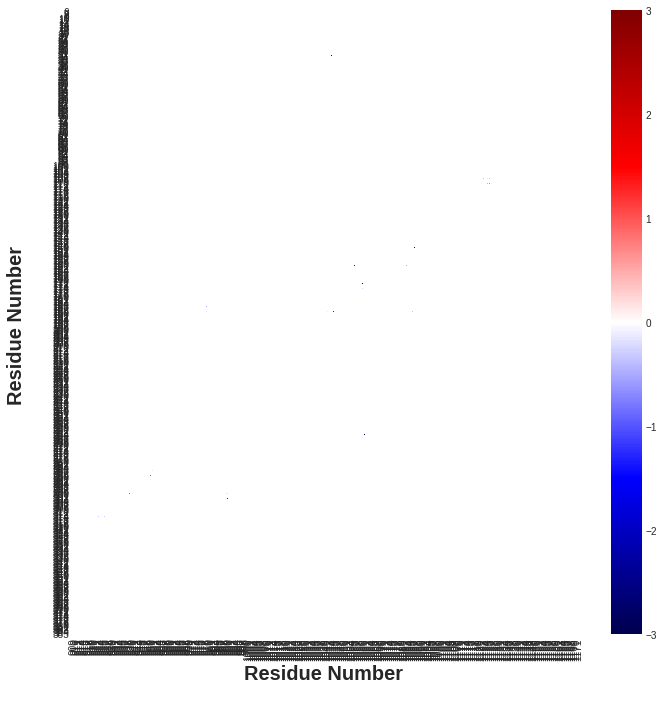

In [134]:
diverging_colors = sns.color_palette("coolwarm", 10)
fig = plt.figure(figsize=(10,10))
ax=sns.heatmap(to_plot,vmin=-3, vmax=3,xticklabels=1, yticklabels=1, cbar=True,linewidths=.5, annot=False, cmap='seismic')
#ax.collections[0].colorbar.set_label("\n Interface Energy (REU)", fontsize='14', fontweight='bold')
plt.xlabel('Residue Number \n', fontsize='20', fontweight='bold')
plt.ylabel('Residue Number \n', fontsize='20', fontweight='bold')
#plt.xticks(fontsize=20, rotation = 90)
#plt.yticks(fontsize=20, rotation = 0)
#cax = plt.gcf().axes[-1]
#cax.tick_params(labelsize=20)
#sns.heatmap((pd.DataFrame(result.sum(axis=0))).transpose(), ax=ax,  annot=True, cmap="RdBu", cbar=False, xticklabels=False, yticklabels=False)
#plt.title('Homo sapiens, control\n', fontsize='28', fontweight='bold')
plt.tight_layout()
#plt.savefig('../figures/interface_quants/heatmaps/TMD1_TMD2_example_heatmap.svg', format='svg')
plt.show()

In [57]:
thres = 0
n = 100

In [181]:
# TMD1/NBD1 interface
#param3 = [156,185]
#param1 = [460,480]


# TMD1/TMD2 interface
#param3 = [6,385]
#param1 = [909,1172]


# TMD1/NBD2 interface
#param3 = [250,290]
#param1 = [1281,1313]

# NBD1/TMD2 interface
#param3 = [485,520]
#param1 = [1060,1080]

# NBD1/NBD2 interface
#param3 = [445,635]
#param1 = [1208,1435]


# TMD2/NBD2 interface
param3 = [950,980]
param1 = [1246,1266]


In [182]:
WT_cl_interface_dist = []
for j in WT_cl_reindexed_results[:n]:
    WT_cl_interface1 = j[[str(i) for i in range(param1[0],param1[1])]].loc[param3[0]:param3[1]] 
    WT_cl_interface1[np.abs(WT_cl_interface1) < thres] = 0
    #WT_cl_interface2 = j[[str(i) for i in range(param2[0],param2[1])]].loc[param3[0]:param3[1]]
    #WT_cl_interface2[np.abs(WT_cl_interface2) < thres] = 0
    WT_cl_interface_sum = WT_cl_interface1.sum().sum()# + WT_cl_interface2.sum().sum()
    WT_cl_interface_dist.append(WT_cl_interface_sum)

In [183]:
F508del_cl_interface_dist = []
for j in F508del_cl_reindexed_results[:n]:
    F508del_cl_interface1 = j[[str(i) for i in range(param1[0],param1[1])]].loc[param3[0]:param3[1]] 
    F508del_cl_interface1[np.abs(F508del_cl_interface1) < thres] = 0
    #F508del_cl_interface2 = j[[str(i) for i in range(param2[0],param2[1])]].loc[param3[0]:param3[1]]
    #F508del_cl_interface2[np.abs(F508del_cl_interface2) < thres] = 0
    F508del_cl_interface_sum = F508del_cl_interface1.sum().sum()# + F508del_cl_interface2.sum().sum()
    F508del_cl_interface_dist.append(F508del_cl_interface_sum)

In [184]:
#F508del_VX8_cl_interface_dist = []
#for j in F508del_VX8_cl_reindexed_results[:n]:
 #   F508del_VX8_cl_interface1 = j[[str(i) for i in range(param1[0],param1[1])]].loc[param3[0]:param3[1]] 
  #  F508del_VX8_cl_interface1[np.abs(F508del_VX8_cl_interface1) < thres] = 0
    #F508del_VX8_cl_interface2 = j[[str(i) for i in range(param2[0],param2[1])]].loc[param3[0]:param3[1]]
    #F508del_VX8_cl_interface2[np.abs(F508del_VX8_cl_interface2) < thres] = 0
   # F508del_VX8_cl_interface_sum = F508del_VX8_cl_interface1.sum().sum() #+ F508del_VX8_cl_interface2.sum().sum()
    #F508del_VX8_cl_interface_dist.append(F508del_VX8_cl_interface_sum)
    


In [185]:
R1070W_cl_interface_dist = []
for j in R1070W_cl_reindexed_results[:n]:
    R1070W_cl_interface1 = j[[str(i) for i in range(param1[0],param1[1])]].loc[param3[0]:param3[1]] 
    R1070W_cl_interface1[np.abs(R1070W_cl_interface1) < thres] = 0
    #R1070W_cl_interface2 = j[[str(i) for i in range(param2[0],param2[1])]].loc[param3[0]:param3[1]]
    #R1070W_cl_interface2[np.abs(R1070W_cl_interface2) < thres] = 0
    R1070W_cl_interface_sum = R1070W_cl_interface1.sum().sum()# + R1070W_cl_interface2.sum().sum()
    R1070W_cl_interface_dist.append(R1070W_cl_interface_sum)

In [186]:
R1070W_VX809_cl_interface_dist = []
for j in R1070W_VX809_cl_reindexed_results[:n]:
    R1070W_VX809_cl_interface1 = j[[str(i) for i in range(param1[0],param1[1])]].loc[param3[0]:param3[1]] 
    R1070W_VX809_cl_interface1[np.abs(R1070W_cl_interface1) < thres] = 0
    R1070W_VX809_cl_interface_sum = R1070W_VX809_cl_interface1.sum().sum()# + R1070W_cl_interface2.sum().sum()
    R1070W_VX809_cl_interface_dist.append(R1070W_VX809_cl_interface_sum)

In [187]:
WT_op_interface_dist = []
for j in WT_op_reindexed_results[:n]:
    WT_op_interface1 = j[[str(i) for i in range(param1[0],param1[1])]].loc[param3[0]:param3[1]] 
    WT_op_interface1[np.abs(WT_op_interface1) < thres] = 0
    #WT_op_interface2 = j[[str(i) for i in range(param2[0],param2[1])]].loc[param3[0]:param3[1]]
    #WT_op_interface2[np.abs(WT_op_interface2) < thres] = 0
    WT_op_interface_sum = WT_op_interface1.sum().sum() #+ WT_op_interface2.sum().sum()
    WT_op_interface_dist.append(WT_op_interface_sum)

In [188]:
F508del_op_interface_dist = []
for j in F508del_op_reindexed_results[:n]:
    F508del_op_interface1 = j[[str(i) for i in range(param1[0],param1[1])]].loc[param3[0]:param3[1]] 
    F508del_op_interface1[np.abs(F508del_op_interface1) < thres] = 0
    #F508del_op_interface2 = j[[str(i) for i in range(param2[0],param2[1])]].loc[param3[0]:param3[1]]
    #F508del_op_interface2[np.abs(F508del_op_interface2) < thres] = 0
    F508del_op_interface_sum = F508del_op_interface1.sum().sum()# + F508del_op_interface2.sum().sum()
    F508del_op_interface_dist.append(F508del_op_interface_sum)

In [189]:
#F508del_VX8_op_interface_dist = []
#for j in F508del_VX8_op_reindexed_results[:n]:
 #   F508del_VX8_op_interface1 = j[[str(i) for i in range(param1[0],param1[1])]].loc[param3[0]:param3[1]] 
  #  F508del_VX8_op_interface1[np.abs(F508del_VX8_op_interface1) < thres] = 0
    #F508del_VX8_op_interface2 = j[[str(i) for i in range(param2[0],param2[1])]].loc[param3[0]:param3[1]]
    #F508del_VX8_op_interface2[np.abs(F508del_VX8_op_interface2) < thres] = 0
   # F508del_VX8_op_interface_sum = F508del_VX8_op_interface1.sum().sum() #+ F508del_VX8_op_interface2.sum().sum()
    #F508del_VX8_op_interface_dist.append(F508del_VX8_op_interface_sum)

In [190]:
R1070W_op_interface_dist = []
for j in R1070W_op_reindexed_results[:n]:
    R1070W_op_interface1 = j[[str(i) for i in range(param1[0],param1[1])]].loc[param3[0]:param3[1]]
    R1070W_op_interface1[np.abs(R1070W_op_interface1) < thres] = 0
    #R1070W_op_interface2 = j[[str(i) for i in range(param2[0],param2[1])]].loc[param3[0]:param3[1]]
    #R1070W_op_interface1[np.abs(R1070W_op_interface1) < thres] = 0
    R1070W_op_interface_sum = R1070W_op_interface1.sum().sum() #+ R1070W_op_interface2.sum().sum()
    R1070W_op_interface_dist.append(R1070W_op_interface_sum)

In [191]:
R1070W_VX809_op_interface_dist = []
for j in R1070W_VX809_op_reindexed_results[:n]:
    R1070W_VX809_op_interface1 = j[[str(i) for i in range(param1[0],param1[1])]].loc[param3[0]:param3[1]]
    R1070W_VX809_op_interface1[np.abs(R1070W_VX809_op_interface1) < thres] = 0
    R1070W_VX809_op_interface_sum = R1070W_VX809_op_interface1.sum().sum() 
    R1070W_VX809_op_interface_dist.append(R1070W_VX809_op_interface_sum)

In [192]:
stat1 = stats.mannwhitneyu(R1070W_cl_interface_dist, R1070W_VX809_cl_interface_dist)
stat2 = stats.mannwhitneyu(R1070W_op_interface_dist, R1070W_VX809_op_interface_dist)
print('closed R1070W vs. R1070W + VX-809  ' + str(stat1[1]))
print('open R1070W vs. R1070W + VX-809  ' + str(stat2[1]))

closed R1070W vs. R1070W + VX-809  0.4994976166118218
open R1070W vs. R1070W + VX-809  0.020666984704594656


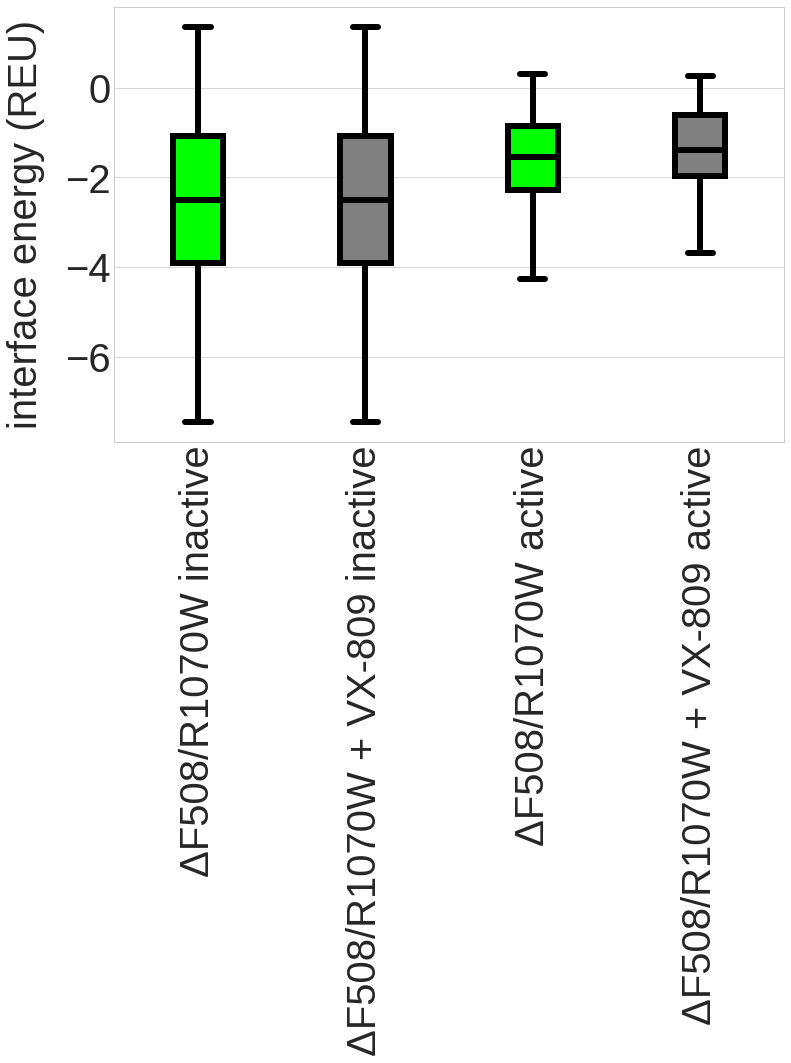

In [193]:
c = 'k'
linwid = 7
plt.figure(figsize=(12,8))




plt.boxplot([R1070W_cl_interface_dist, R1070W_op_interface_dist], showfliers = False,
            positions=[1,3], notch=False, patch_artist=True,
            boxprops=dict(facecolor='lime', color=c, lw=6),
            capprops=dict(color=c, lw=6),
            whiskerprops=dict(color=c, lw=6),
            flierprops=dict(color=c, markeredgecolor=c, lw=6),
            medianprops=dict(color=c, lw=6),
             )

plt.boxplot([R1070W_VX809_cl_interface_dist, R1070W_VX809_op_interface_dist], showfliers = False,
            positions=[2,4],notch=False, patch_artist=True,
            boxprops=dict(facecolor='grey', color=c, lw=6),
            capprops=dict(color=c, lw=6),
            whiskerprops=dict(color=c, lw=6),
            medianprops=dict(color=c, lw=6),
            )





plt.grid(False, axis='x')


plt.grid(False, axis='x')
plt.yticks(size=40)
#lab = ['WT closed', '\u0394F508 closed', 'WT open', '\u0394F508 open']
lab = ['\u0394F508/R1070W inactive', '\u0394F508/R1070W + VX-809 inactive', '\u0394F508/R1070W active', '\u0394F508/R1070W + VX-809 active']

plt.xticks(ticks = [1,2,3,4], labels = lab, size=40, rotation =90)
plt.ylabel('interface energy (REU)', fontsize=40, labelpad=20)
plt.savefig('../figures/interface_quants/interface_only/R1070W_VX809_TMD2_NBD2.svg', format='svg')
plt.show()


In [94]:
stat1 = stats.mannwhitneyu(WT_cl_interface_dist, F508del_cl_interface_dist)
stat2 = stats.mannwhitneyu(WT_op_interface_dist, F508del_op_interface_dist)


print('F508del vs. WT in the CLOSED state ' + str(stat1[1]))
print('F508del vs. WT in the OPEN state ' + str(stat2[1]))

F508del vs. WT in the CLOSED state 0.07653987744029496
F508del vs. WT in the OPEN state 0.08165762366477014


In [95]:
stat1 = stats.mannwhitneyu(R1070W_cl_interface_dist, F508del_cl_interface_dist)
stat2 = stats.mannwhitneyu(R1070W_op_interface_dist, F508del_op_interface_dist)


print('F508del vs. R1070W in the CLOSED state ' + str(stat1[1]))
print('F508del vs. R1070W in the OPEN state ' + str(stat2[1]))

F508del vs. R1070W in the CLOSED state 0.30463884006909847
F508del vs. R1070W in the OPEN state 0.19299444484960082


In [96]:
stat1 = stats.mannwhitneyu(F508del_cl_interface_dist, F508del_VX8_cl_interface_dist)
stat2 = stats.mannwhitneyu(F508del_op_interface_dist, F508del_VX8_op_interface_dist)
print('closed F508del vs. F508del + VX-809  ' + str(stat1[1]))
print('open F508del vs. F508del + VX-809  ' + str(stat2[1]))

closed F508del vs. F508del + VX-809  0.0022558986126614195
open F508del vs. F508del + VX-809  0.49802090029575763


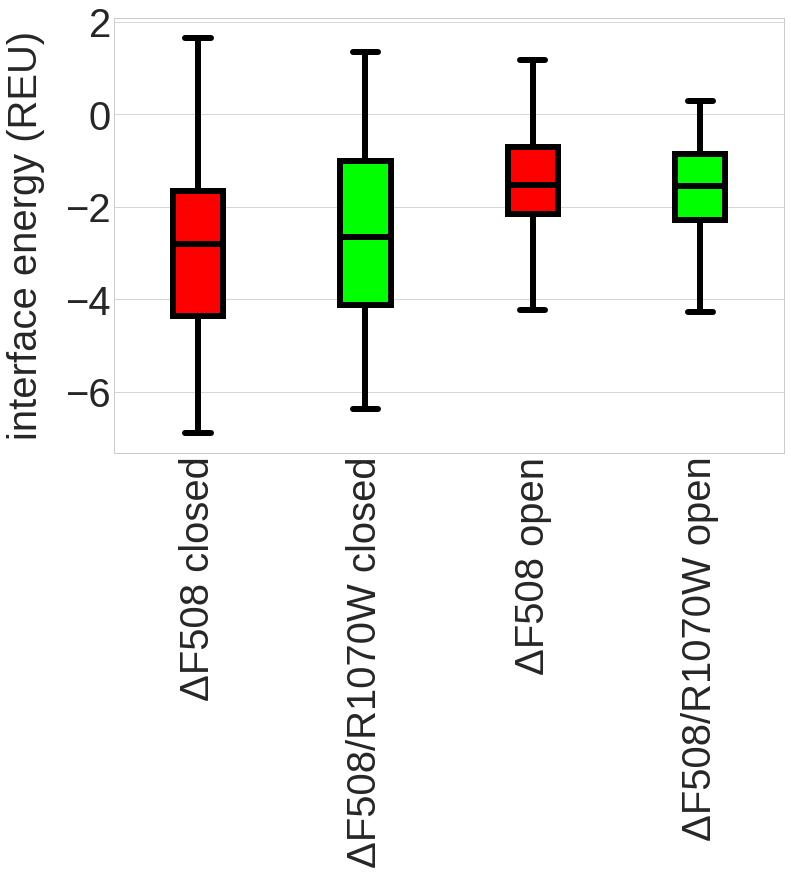

In [99]:
c = 'k'
linwid = 7
plt.figure(figsize=(12,8))
'''
plt.boxplot([WT_cl_interface_dist, WT_op_interface_dist], showfliers = False,
            positions=[1,3], notch=False, patch_artist=True,
            boxprops=dict(facecolor='dodgerblue', color=c, lw=6),
            capprops=dict(color=c, lw=6),
            whiskerprops=dict(color=c, lw=6),
            flierprops=dict(color=c, markeredgecolor=c, lw=6),
            medianprops=dict(color=c, lw=6),
             )
'''
plt.boxplot([F508del_cl_interface_dist, F508del_op_interface_dist], showfliers = False,
            positions=[1,3],notch=False, patch_artist=True,
            boxprops=dict(facecolor='r', color=c, lw=6),
            capprops=dict(color=c, lw=6),
            whiskerprops=dict(color=c, lw=6),
            medianprops=dict(color=c, lw=6),
            )
'''
plt.boxplot([F508del_VX8_cl_interface_dist, F508del_VX8_op_interface_dist], showfliers = False,
            positions=[2,4],notch=False, patch_artist=True,
            boxprops=dict(facecolor='magenta', color=c, lw=6),
            capprops=dict(color=c, lw=6),
            whiskerprops=dict(color=c, lw=6),
            medianprops=dict(color=c, lw=6),
            )

'''
plt.boxplot([R1070W_cl_interface_dist, R1070W_op_interface_dist], showfliers = False,
            positions=[2,4], notch=False, patch_artist=True,
            boxprops=dict(facecolor='lime', color=c, lw=6),
            capprops=dict(color=c, lw=6),
            whiskerprops=dict(color=c, lw=6),
            flierprops=dict(color=c, markeredgecolor=c, lw=6),
            medianprops=dict(color=c, lw=6),
             )





plt.grid(False, axis='x')


plt.grid(False, axis='x')
plt.yticks(size=40)
#lab = ['WT closed', '\u0394F508 closed', 'WT open', '\u0394F508 open']
lab = ['\u0394F508 inactive', '\u0394F508/R1070W inactive', '\u0394F508 active', '\u0394F508/R1070W active']

plt.xticks(ticks = [1,2,3,4], labels = lab, size=40, rotation =90)
plt.ylabel('interface energy (REU)', fontsize=40, labelpad=20)
#plt.savefig('../figures/interface_quants/interface_only/F508del_R1070W_TMD2_NBD2.svg', format='svg')
plt.show()


In [86]:
stat1 = stats.mannwhitneyu(R1070W_cl_interface_dist, F508del_cl_interface_dist)
stat2 = stats.mannwhitneyu(R1070W_cl_interface_dist, R1070W_VX809_cl_interface_dist)


print('F508del vs. R1070W in the CLOSED state ' + str(stat1[1]))
print('R1070W vs. R1070W + VX809 in the CLOSED state ' + str(stat2[1]))

F508del vs. R1070W in the CLOSED state 1.5218725200780563e-05
R1070W vs. R1070W + VX809 in the CLOSED state 0.4994976246193183


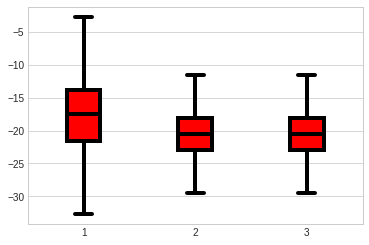

In [85]:
c = 'k'


plt.boxplot([F508del_cl_interface_dist, R1070W_cl_interface_dist, R1070W_VX809_cl_interface_dist], showfliers = False,
            positions=[1,2,3],notch=False, patch_artist=True,
            boxprops=dict(facecolor='r', color=c, lw=4),
            capprops=dict(color=c, lw=4),
            whiskerprops=dict(color=c, lw=4),
            medianprops=dict(color=c, lw=4),
            )
#plt.boxplot([R1070W_cl_interface_dist, R1070W_op_interface_dist], showfliers = False,
 #           positions=[2,4], notch=False, patch_artist=True,
  #          boxprops=dict(facecolor='lime', color=c, lw=4),
   #         capprops=dict(color=c, lw=4),
    #        whiskerprops=dict(color=c, lw=4),
     #       flierprops=dict(color=c, markeredgecolor=c, lw=4),
      #      medianprops=dict(color=c, lw=4),
       #      )


plt.grid(False, axis='x')



plt.show()

In [97]:
stat1 = stats.mannwhitneyu(F508del_cl_interface_dist, F508del_VX8_cl_interface_dist)
stat2 = stats.mannwhitneyu(F508del_op_interface_dist, F508del_VX8_op_interface_dist)
print('closed F508del vs. F508del + VX-809  ' + str(stat1[1]))
print('open F508del vs. F508del + VX-809  ' + str(stat2[1]))

closed F508del vs. F508del + VX-809  5.638001712147494e-05
open F508del vs. F508del + VX-809  0.013209507547532653


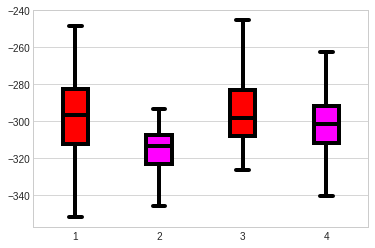

In [98]:
c = 'k'


plt.boxplot([F508del_cl_interface_dist, F508del_op_interface_dist], showfliers = False,
            positions=[1,3],notch=False, patch_artist=True,
            boxprops=dict(facecolor='r', color=c, lw=4),
            capprops=dict(color=c, lw=4),
            whiskerprops=dict(color=c, lw=4),
            medianprops=dict(color=c, lw=4),
            )
plt.boxplot([F508del_VX8_cl_interface_dist, F508del_VX8_op_interface_dist], showfliers = False,
            positions=[2,4],notch=False, patch_artist=True,
            boxprops=dict(facecolor='magenta', color=c, lw=4),
            capprops=dict(color=c, lw=4),
            whiskerprops=dict(color=c, lw=4),
            medianprops=dict(color=c, lw=4),
            )


plt.grid(False, axis='x')



plt.show()

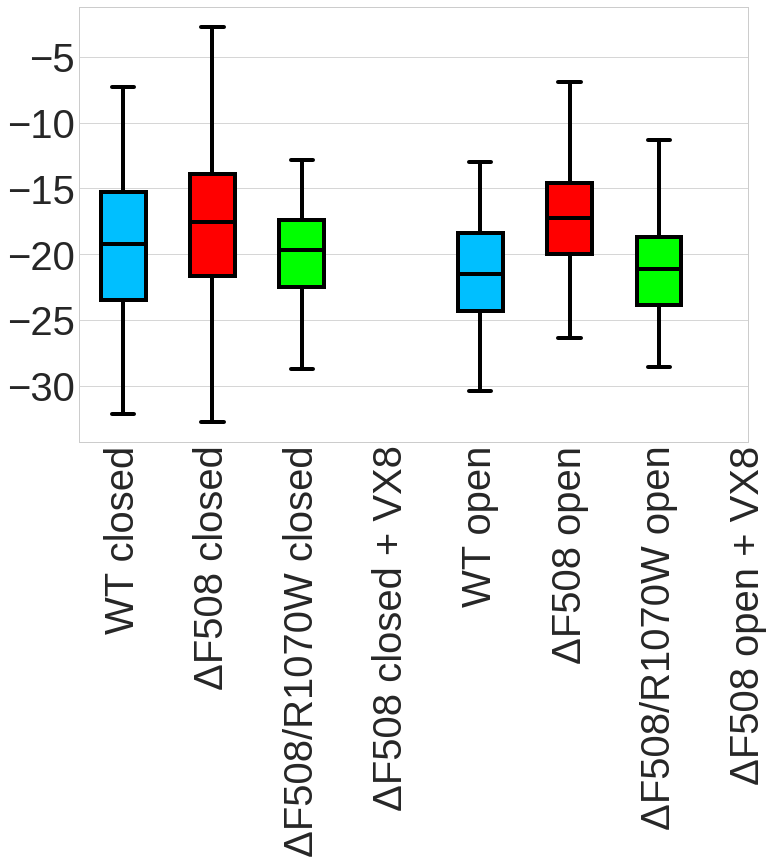

In [57]:
c = 'k'
plt.figure(figsize=(12,8))
plt.boxplot([WT_cl_interface_dist, WT_op_interface_dist], positions=[1,5], showfliers = False,
            notch=False, patch_artist=True,
            boxprops=dict(facecolor='deepskyblue', color=c, lw=4),
            capprops=dict(color=c,lw=4),
            whiskerprops=dict(color=c,lw=4),
            medianprops=dict(color=c, lw=4),
            )

plt.boxplot([F508del_cl_interface_dist, F508del_op_interface_dist], showfliers = False,
            positions=[2,6],notch=False, patch_artist=True,
            boxprops=dict(facecolor='r', color=c, lw=4),
            capprops=dict(color=c, lw=4),
            whiskerprops=dict(color=c, lw=4),
            medianprops=dict(color=c, lw=4),
            )

plt.boxplot([R1070W_cl_interface_dist, R1070W_op_interface_dist], showfliers = False,
            positions=[3,7], notch=False, patch_artist=True,
            boxprops=dict(facecolor='lime', color=c, lw=4),
            capprops=dict(color=c, lw=4),
            whiskerprops=dict(color=c, lw=4),
            flierprops=dict(color=c, markeredgecolor=c, lw=4),
            medianprops=dict(color=c, lw=4),
             )

#plt.boxplot([F508del_VX8_cl_interface_dist, F508del_VX8_op_interface_dist], showfliers = False,
 #           positions=[4,8],notch=False, patch_artist=True,
  #          boxprops=dict(facecolor='magenta', color=c, lw=4),
   #         capprops=dict(color=c, lw=4),
    #        whiskerprops=dict(color=c, lw=4),
     #       medianprops=dict(color=c, lw=4),
      #      )


plt.grid(False, axis='x')
plt.yticks(size=40)
lab = ['WT closed', '\u0394F508 closed', '\u0394F508/R1070W closed', '\u0394F508 closed + VX8', 'WT open', '\u0394F508 open', '\u0394F508/R1070W open', '\u0394F508 open + VX8']
#lab = ['WT closed', '\u0394F508 closed',  'WT open', '\u0394F508 open']

plt.xticks(ticks = [1,2,3,4,5,6,7,8], labels = lab, size=40, rotation =90)

#plt.savefig('../figures/NBD2_NBD2_interface_energy.svg', format='svg')
plt.show()

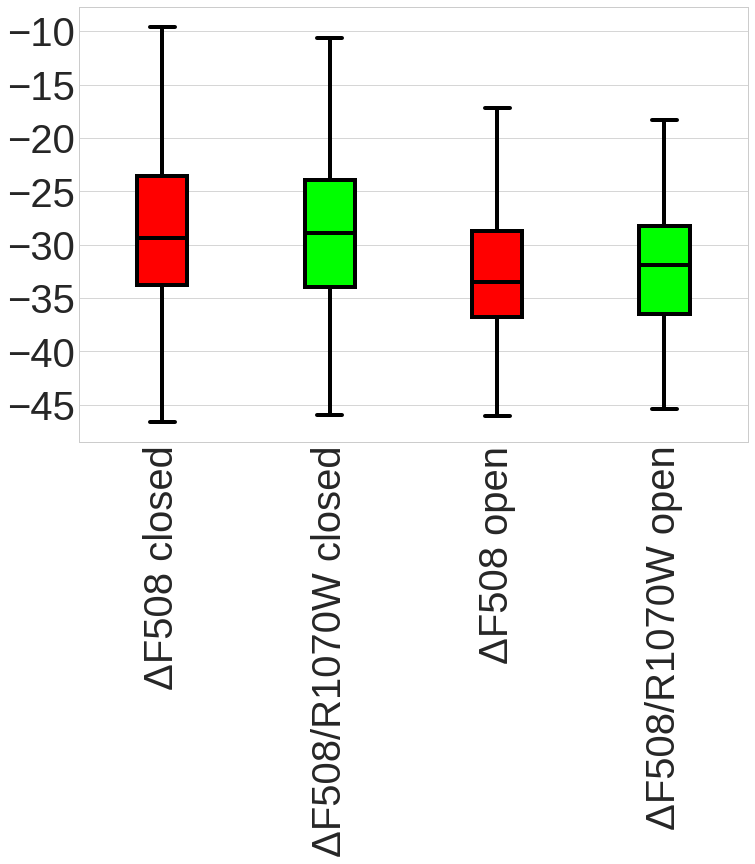

In [248]:
c = 'k'
plt.figure(figsize=(12,8))
plt.boxplot([F508del_cl_interface_dist, F508del_op_interface_dist], showfliers = False,
            positions=[1,3],notch=False, patch_artist=True,
            boxprops=dict(facecolor='r', color=c, lw=4),
            capprops=dict(color=c, lw=4),
            whiskerprops=dict(color=c, lw=4),
            medianprops=dict(color=c, lw=4),
            )

plt.boxplot([R1070W_cl_interface_dist, R1070W_op_interface_dist], showfliers = False,
            positions=[2,4],notch=False, patch_artist=True,
            boxprops=dict(facecolor='lime', color=c, lw=4),
            capprops=dict(color=c, lw=4),
            whiskerprops=dict(color=c, lw=4),
            medianprops=dict(color=c, lw=4),
            )
plt.grid(False, axis='x')
lab = ['\u0394F508 closed', '\u0394F508/R1070W closed', '\u0394F508 open', '\u0394F508/R1070W open']

plt.yticks(size=40)
plt.xticks(ticks = [1,2,3,4], labels = lab, size=40, rotation =90)
#plt.savefig('../figures/R1070W_NBD1_TMD2_interface_energy.svg', format='svg')
plt.show()

## Plot an example interface energy plot

In [87]:
#param1 = [445,635]
param1 = [909,1172]
param3 = [909,1172]
#param2 = [845,883]
#param1 = [1060,1080]
param2 = [480,520]
#param1 = [445,635]
#param3 = [445,635]
#param1 = [386,402]
#param1 = [6,385]
#param3 = [6,385]

#param1 = [1208,1435]
#param3 = [1208,1435]

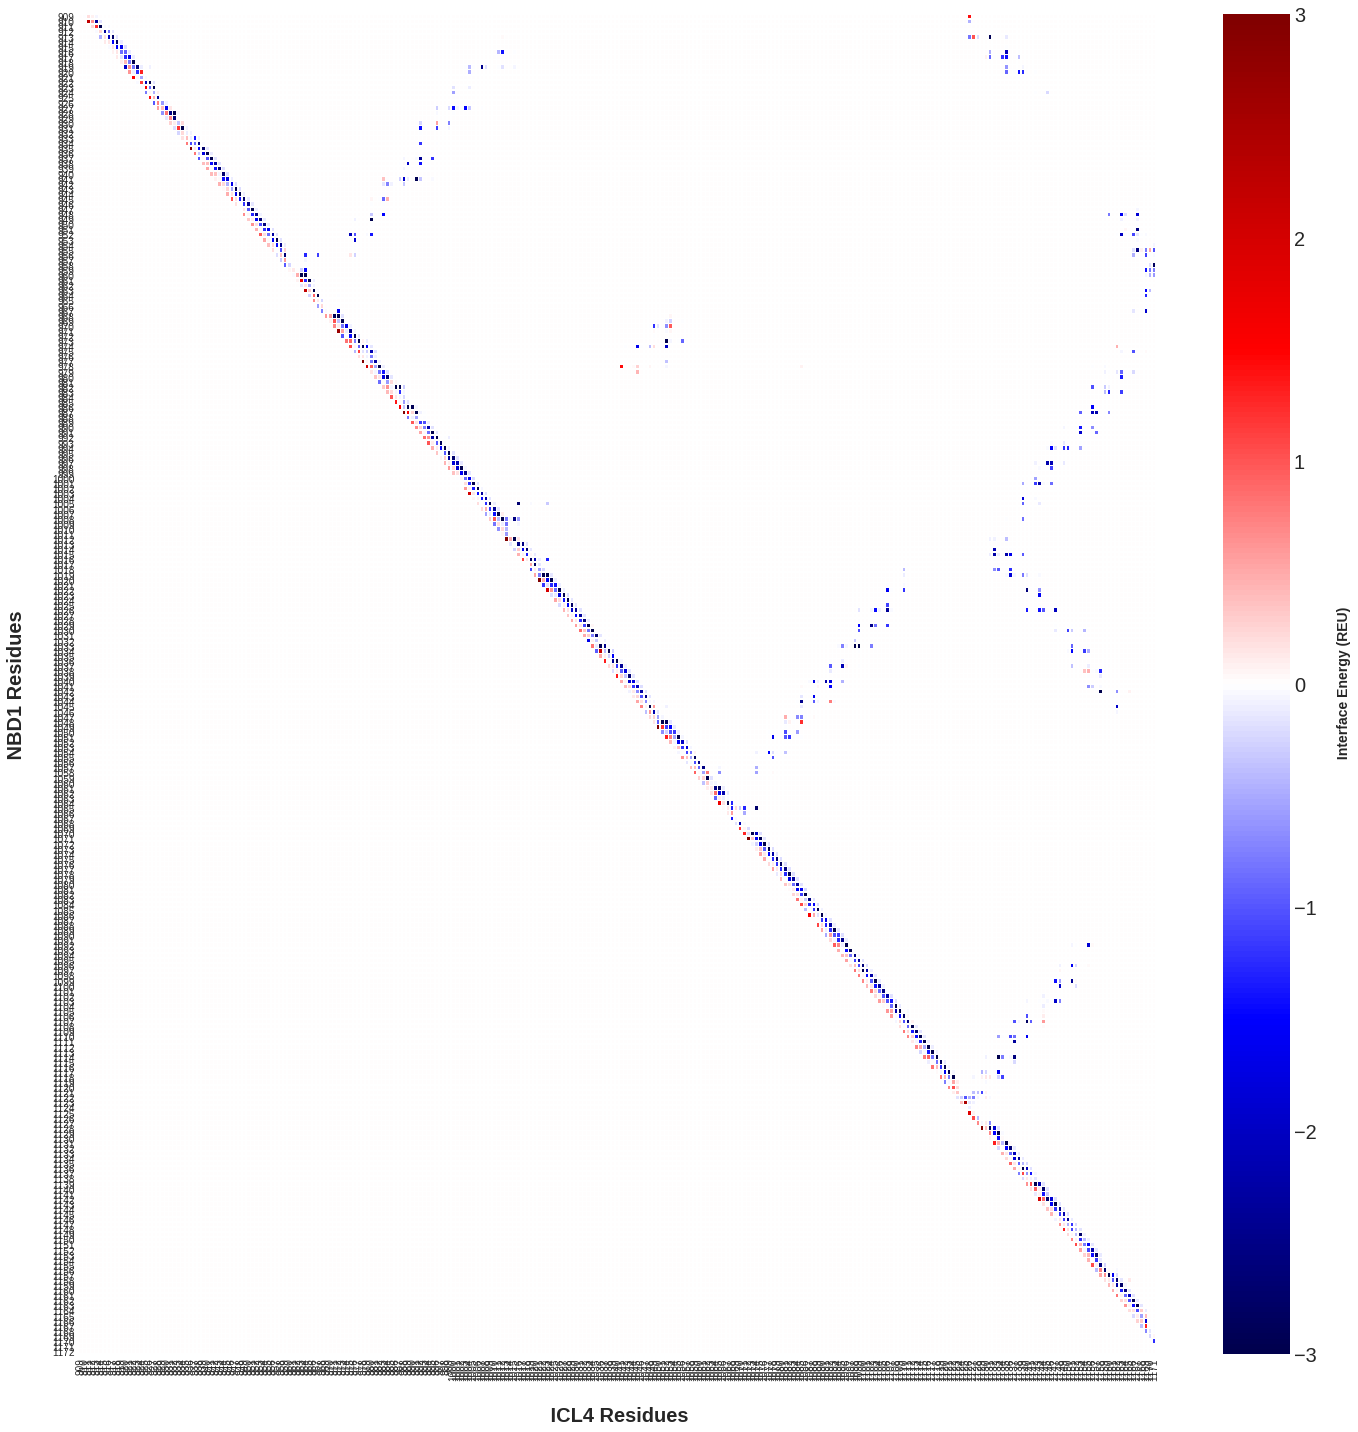

In [ ]:
'''
stat1 = stats.mannwhitneyu(WT_cl_interface_dist, WT_op_interface_dist) 
stat2 = stats.mannwhitneyu(F508del_cl_interface_dist, F508del_op_interface_dist) 
stat3 = stats.mannwhitneyu(R1070W_cl_interface_dist, R1070W_op_interface_dist)


print('closed vs. open WT       ' + str(stat1[1]))
print('closed vs. open F508del  ' + str(stat2[1]))
print('closed vs. open R1070W   ' + str(stat3[1]))
'''